In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [ ]:
url = 'https://raw.github.ccs.neu.edu/randymr/CS6220-Final/master/final_merged.csv?token=GHSAT0AAAAAAAAAGT4T7S5IFM3FWTONJEB6YT4F7UQ'
df = pd.read_csv(url)

In [ ]:
delete = ['Unnamed: 0', 'Unnamed: 0.1', 'Rk','FG%','2P%','3P%','FT%','ORB','DRB']
df.drop(delete,axis = 1, inplace = True)

In [ ]:
df['salary'] = df['salary'].str.replace('$','')
df['salary'] = df['salary'].str.replace(',','')
df['salary']= pd.to_numeric(df['salary'])

missing = df.isnull().sum().sum()
print("Total missing value: ", missing)
for i in df.columns:
  df[i].interpolate(inplace = True)

Total missing value:  7


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['Pos']= label_encoder.fit_transform(df['Pos'])
 
df['Pos'].unique()

array([ 7,  5,  2, 11,  0,  3, 10,  6,  4, 12, 14,  1, 13,  9,  8])

In [ ]:
df['Tm']= label_encoder.fit_transform(df['Tm'])
 
df['Tm'].unique()

array([ 5, 14, 10,  9, 20, 27,  1,  6, 19, 24,  3,  0, 12, 30, 15,  8, 18,
        2,  4, 26, 11, 13, 16, 21, 28, 25, 29,  7, 23, 17, 22])

In [ ]:
df

,new_name,salary,year,Pos,Age,Tm,G,GS,MP,FG,...,eFG%,FT,FTA,TRB,AST,STL,BLK,TOV,PF,PTS
0,LeBron James,30963450,2017,7,32,5,74,74,37.8,9.9,...,0.594,4.8,7.2,8.6,8.7,1.2,0.6,4.1,1.8,26.4
1,Mike Conley,26540100,2017,5,29,14,69,68,33.2,6.7,...,0.545,4.6,5.3,3.5,6.3,1.3,0.3,2.3,1.8,20.5
2,James Harden,26540100,2017,5,27,10,81,81,36.4,8.3,...,0.525,9.2,10.9,8.1,11.2,1.5,0.5,5.7,2.7,29.1
3,Kevin Durant,26540100,2017,2,28,9,62,62,33.4,8.9,...,0.594,5.4,6.2,8.3,4.8,1.1,1.6,2.2,1.9,25.1
4,Russell Westbrook,26540100,2017,5,28,20,81,81,34.6,10.2,...,0.476,8.8,10.4,10.7,10.4,1.6,0.4,5.4,2.3,31.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,Ignas Brazdeikis,49510,2021,7,22,21,8,0,29.3,4.4,...,0.513,1.0,1.5,5.1,2.0,0.5,0.4,1.4,2.8,11.1
2662,Mike James,39608,2021,5,30,2,13,1,18.2,2.6,...,0.429,1.6,2.1,2.5,4.2,0.5,0.1,1.5,0.8,7.7
2663,Elijah Bryant,24611,2021,11,25,16,1,0,32.0,6.0,...,0.500,3.0,3.0,6.0,3.0,0.0,1.0,4.0,4.0,16.0
2664,Charlie Brown Jr.,19804,2021,11,23,20,9,1,16.9,1.4,...,0.360,1.0,1.1,1.9,1.0,0.4,0.2,0.7,2.1,4.4


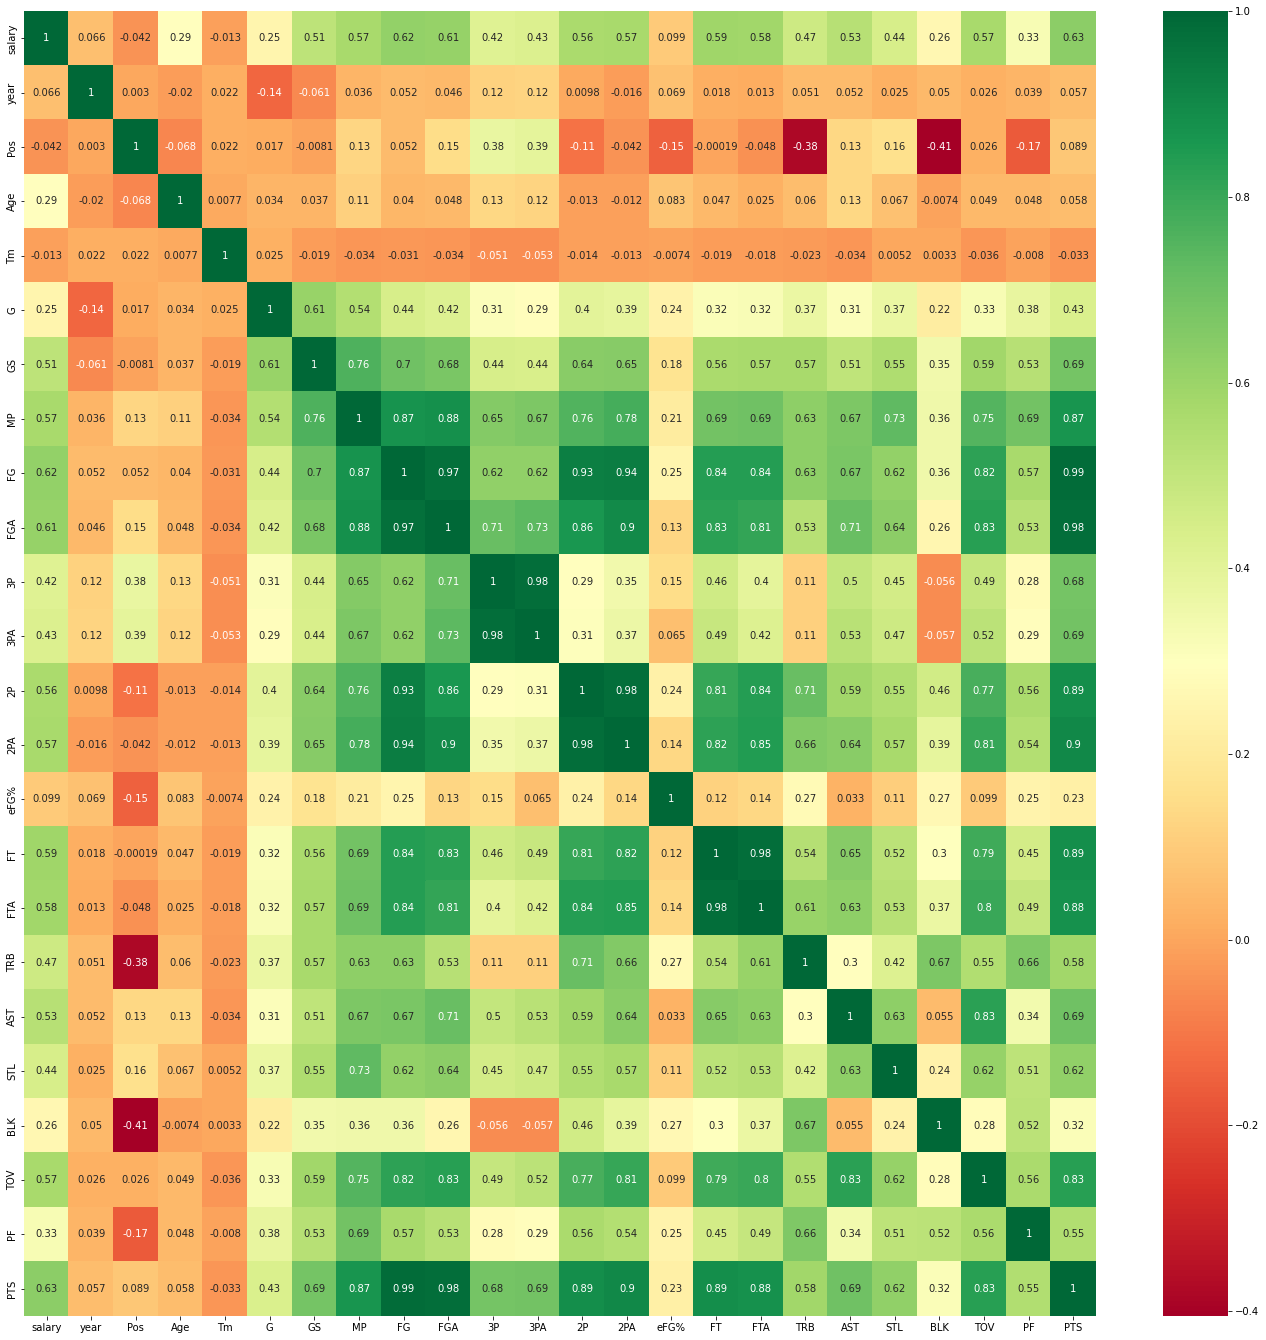

In [ ]:
import seaborn as sns
correlation = df.corr(method = 'pearson')
top_corr_features = correlation.index
plt.figure(figsize=(24,24))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
import statsmodels.api as sm
y = df['salary']
X = df.drop(['new_name','year','salary'],1)

print(X)

X_1 = sm.add_constant(X)
model = sm.OLS(y,X_1).fit()
model.pvalues



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


      Pos  Age  Tm   G  GS    MP    FG   FGA   3P  3PA  ...   eFG%   FT   FTA  \
0       7   32   5  74  74  37.8   9.9  18.2  1.7  4.6  ...  0.594  4.8   7.2   
1       5   29  14  69  68  33.2   6.7  14.6  2.5  6.1  ...  0.545  4.6   5.3   
2       5   27  10  81  81  36.4   8.3  18.9  3.2  9.3  ...  0.525  9.2  10.9   
3       2   28   9  62  62  33.4   8.9  16.5  1.9  5.0  ...  0.594  5.4   6.2   
4       5   28  20  81  81  34.6  10.2  24.0  2.5  7.2  ...  0.476  8.8  10.4   
...   ...  ...  ..  ..  ..   ...   ...   ...  ...  ...  ...    ...  ...   ...   
2661    7   22  21   8   0  29.3   4.4   9.9  1.4  3.4  ...  0.513  1.0   1.5   
2662    5   30   2  13   1  18.2   2.6   7.1  0.8  2.4  ...  0.429  1.6   2.1   
2663   11   25  16   1   0  32.0   6.0  13.0  1.0  5.0  ...  0.500  3.0   3.0   
2664   11   23  20   9   1  16.9   1.4   4.8  0.6  2.3  ...  0.360  1.0   1.1   
2665    5   28   9  10   0   4.0   1.0   1.3  0.2  0.4  ...  0.846  0.3   0.4   

       TRB   AST  STL  BLK 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const    1.640916e-17
Pos      1.337079e-01
Age      5.418911e-62
Tm       3.765068e-01
G        1.757857e-06
GS       3.956468e-17
MP       5.877483e-03
FG       7.724674e-01
FGA      1.678069e-01
3P       4.555229e-01
3PA      2.957775e-01
2P       6.913492e-01
2PA      1.520294e-01
eFG%     2.382554e-02
FT       6.599827e-01
FTA      5.514583e-01
TRB      2.217178e-14
AST      8.267776e-08
STL      2.048256e-02
BLK      4.772859e-03
TOV      7.214234e-01
PF       5.028812e-10
PTS      7.223487e-01
dtype: float64

In [ ]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


['Age', 'G', 'GS', 'MP', 'FGA', '3P', '2PA', 'eFG%', 'TRB', 'AST', 'STL', 'BLK', 'PF', 'PTS']


In [ ]:
#backward elimination
X = df[selected_features_BE].values

In [ ]:
#pearson correlation
# delete2 = ['year','eFG%','STL','BLK','PF','3PA','TOV','2PA','FTA']
# df.drop(delete2,axis = 1, inplace = True)
# X = df.values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   new_name  2666 non-null   object 
 1   salary    2666 non-null   int64  
 2   year      2666 non-null   int64  
 3   Pos       2666 non-null   int64  
 4   Age       2666 non-null   int64  
 5   Tm        2666 non-null   int64  
 6   G         2666 non-null   int64  
 7   GS        2666 non-null   int64  
 8   MP        2666 non-null   float64
 9   FG        2666 non-null   float64
 10  FGA       2666 non-null   float64
 11  3P        2666 non-null   float64
 12  3PA       2666 non-null   float64
 13  2P        2666 non-null   float64
 14  2PA       2666 non-null   float64
 15  eFG%      2666 non-null   float64
 16  FT        2666 non-null   float64
 17  FTA       2666 non-null   float64
 18  TRB       2666 non-null   float64
 19  AST       2666 non-null   float64
 20  STL       2666 non-null   floa

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
y = df.iloc[:,1].values


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = list(df.columns)
x.remove('new_name')
x.remove('salary')
xdf=df[x]

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(xdf.values, i) for i in range(xdf.shape[1])]
vif["features"] = xdf.columns
vif.round(1)

,VIF Factor,features
0,95.5,year
1,4.9,Pos
2,45.3,Age
3,4.0,Tm
4,7.8,G
5,5.1,GS
6,78.2,MP
7,15697.6,FG
8,34024.9,FGA
9,1246.0,3P


In [ ]:
xdf

,year,Pos,Age,Tm,G,GS,MP,FG,FGA,3P,...,eFG%,FT,FTA,TRB,AST,STL,BLK,TOV,PF,PTS
0,2017,7,32,5,74,74,37.8,9.9,18.2,1.7,...,0.594,4.8,7.2,8.6,8.7,1.2,0.6,4.1,1.8,26.4
1,2017,5,29,14,69,68,33.2,6.7,14.6,2.5,...,0.545,4.6,5.3,3.5,6.3,1.3,0.3,2.3,1.8,20.5
2,2017,5,27,10,81,81,36.4,8.3,18.9,3.2,...,0.525,9.2,10.9,8.1,11.2,1.5,0.5,5.7,2.7,29.1
3,2017,2,28,9,62,62,33.4,8.9,16.5,1.9,...,0.594,5.4,6.2,8.3,4.8,1.1,1.6,2.2,1.9,25.1
4,2017,5,28,20,81,81,34.6,10.2,24.0,2.5,...,0.476,8.8,10.4,10.7,10.4,1.6,0.4,5.4,2.3,31.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,2021,7,22,21,8,0,29.3,4.4,9.9,1.4,...,0.513,1.0,1.5,5.1,2.0,0.5,0.4,1.4,2.8,11.1
2662,2021,5,30,2,13,1,18.2,2.6,7.1,0.8,...,0.429,1.6,2.1,2.5,4.2,0.5,0.1,1.5,0.8,7.7
2663,2021,11,25,16,1,0,32.0,6.0,13.0,1.0,...,0.500,3.0,3.0,6.0,3.0,0.0,1.0,4.0,4.0,16.0
2664,2021,11,23,20,9,1,16.9,1.4,4.8,0.6,...,0.360,1.0,1.1,1.9,1.0,0.4,0.2,0.7,2.1,4.4


In [ ]:
#Vif
# delete3 = ['FG','FGA','3P','2P','3PA','2PA','FT','PTS','new_name','salary','year']
# df.drop(delete3,axis = 1, inplace = True)
# X = df.values

In [ ]:
new_list = list(df.columns)
print(new_list)
new_list.remove('new_name')
new_list.remove('salary')
abc = df[new_list]

vif2 = pd.DataFrame()
vif2["VIF Factor"] = [variance_inflation_factor(abc.values, i) for i in range(abc.shape[1])]
vif2["features"] = abc.columns
vif2.round(1)


['new_name', 'salary', 'year', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'eFG%', 'FT', 'FTA', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']


,VIF Factor,features
0,95.5,year
1,4.9,Pos
2,45.3,Age
3,4.0,Tm
4,7.8,G
5,5.1,GS
6,78.2,MP
7,15697.6,FG
8,34024.9,FGA
9,1246.0,3P


In [ ]:
df_vif = vif2.round(1)
df_vif= df_vif.loc[df_vif['VIF Factor'] < 500]
print(df_vif)

    VIF Factor features
0         95.5     year
1          4.9      Pos
2         45.3      Age
3          4.0       Tm
4          7.8        G
5          5.1       GS
6         78.2       MP
13        50.8     eFG%
15       115.8      FTA
16        15.8      TRB
17        11.0      AST
18         8.5      STL
19         4.3      BLK
20        23.7      TOV
21        18.9       PF


<Figure size 1440x360 with 0 Axes>

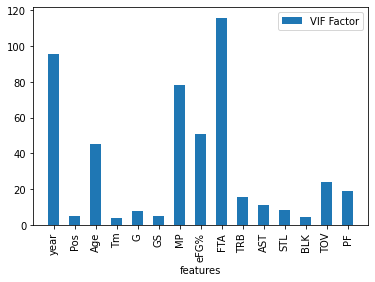

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
df_vif.plot(x='features',y=['VIF Factor'],kind='bar')
plt.autoscale()

In [ ]:
# delete6 = ['FG','FGA','3P','3PA','2P','2PA','eFG%','FT','PTS','new_name','salary']
# df.drop(delete6,axis = 1, inplace = True)
# X = df.values

In [ ]:
X

array([[32. , 74. , 74. , ...,  0.6,  1.8, 26.4],
       [29. , 69. , 68. , ...,  0.3,  1.8, 20.5],
       [27. , 81. , 81. , ...,  0.5,  2.7, 29.1],
       ...,
       [25. ,  1. ,  0. , ...,  1. ,  4. , 16. ],
       [23. ,  9. ,  1. , ...,  0.2,  2.1,  4.4],
       [28. , 10. ,  0. , ...,  0.1,  0.8,  2.5]])

In [ ]:
y

array([30963450, 26540100, 26540100, ...,    24611,    19804,    11898])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
regressor = LinearRegression()
regressor.fit(X_train, y_train) 

LinearRegression()

In [ ]:
print('Intercept:', regressor.intercept_)
print('Coefficients:', regressor.coef_)

Intercept: -8668110.926239356
Coefficients: [  454027.78341296   -28633.24414896    57105.67393942  -103028.58557555
  1052909.571687   -3271576.25154507 -1604603.79039691 -3369406.67501503
   663281.01922767   541402.09263801  1041031.83347113  1002646.55744057
 -1577430.6141428    921760.14519651]


In [ ]:
y_pred = regressor.predict(X_test)
y_pred

array([ 5.16443884e+06, -2.22430237e+06,  2.20731679e+07,  8.01722216e+06,
        6.62256706e+06,  4.64353819e+06,  1.76949116e+07,  1.39344123e+07,
        8.37079646e+06,  2.22916507e+06,  6.02108168e+05,  1.14777140e+07,
        6.01982015e+06,  1.18157088e+07,  8.99034720e+06,  3.53493299e+06,
        2.86922963e+06,  8.04981412e+06, -2.81742773e+05,  4.00705852e+06,
       -5.35284754e+05,  1.40622902e+07,  1.23045977e+06,  7.70558227e+06,
        1.22106399e+07,  4.20162635e+06,  6.20031495e+06, -4.51831913e+04,
        2.02943015e+05,  1.70114014e+07,  9.65811402e+06, -7.18954909e+05,
        6.30566943e+06,  1.80694478e+06,  1.84935155e+06,  2.32001178e+06,
        7.25422411e+06,  8.83265078e+05,  2.18984140e+06,  4.63511067e+06,
        3.82401301e+06,  1.69315905e+06,  5.83190379e+06,  5.81935163e+06,
        9.82244920e+06,  6.13909110e+06,  9.32529931e+06,  6.49726885e+06,
       -1.36891439e+06, -7.12239998e+05,  2.31866948e+06,  5.57194804e+06,
        1.11137389e+07,  

In [ ]:
y_test

array([ 5348007,  2407560, 34379100, 10203755, 13333333,  7068360,
        3314365, 12598243,  2545320,  3332940,   898310, 13000000,
         512746, 11233146,  7250000,   138414,  5273826,  5000000,
        1378242,  2700000,   898310, 12776786,   595122,  6666667,
       13425895,   980431,   510589,  3944013,  1500000, 28500000,
        9000000,  1740000,  1454756,  4969080,  2625000,  1378242,
       19000000,   869094,  1762796,  5192307,  1762796,  3121080,
        1512601,  1544951,  3218280,  3500000, 11400000,  2368327,
        1874640,  1977000,  1524305,  5000000, 17000000,  8000000,
       25595700, 15330435,  1471382,   123056, 15170787,  4402546,
        4458000,  3046200,  5200000,  1416852,  6000000,   154433,
       37436858,  7300000, 24000000,   432890,  5450000,  5470920,
        1663861,  2443440,  3000000,  1000000, 12093023, 11550000,
       14041096, 25467250,  7250000,  1471382,  3675480, 14087500,
        1569360,  8081363,  9590602,   439475,   937800,  6286

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print ('Root Mean Squared Error is :', rmse)
linear_reg_mse = rmse

Root Mean Squared Error is : 5535863.396649894


In [ ]:
from sklearn.metrics import r2_score

print(r2_score(y_test,y_pred))
linear_reg_r2_score = r2_score(y_test,y_pred)

0.5656455423772904


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
 
poly_transform = PolynomialFeatures(degree=2, include_bias=False)
x_poly_train = poly_transform.fit_transform(X_train)
x_poly_test = poly_transform.transform(X_test)
from sklearn.linear_model import LinearRegression
regressor2 = LinearRegression()
regressor2.fit(x_poly_train, y_train)

LinearRegression()

In [ ]:
y_pred2 = regressor2.predict(x_poly_test)
y_pred2
print(r2_score(y_test,y_pred2))
poly_r2_score = r2_score(y_test,y_pred2)
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2))
print ('Root Mean Squared Error is :', rmse2)
poly_mse = rmse2

0.6258129315025391
Root Mean Squared Error is : 5138159.845258374


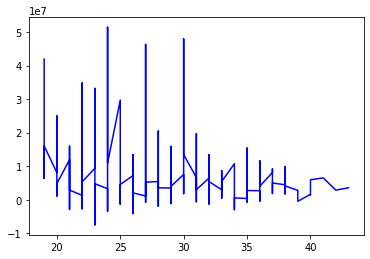

In [ ]:
df_new_poly = xdf.copy()

df_new_poly = df_new_poly.sort_values(by = 'Age')
X_poly = poly_transform.fit_transform(X)
plt.plot(df_new_poly['Age'],regressor2.predict(X_poly),color='blue')
plt.show()


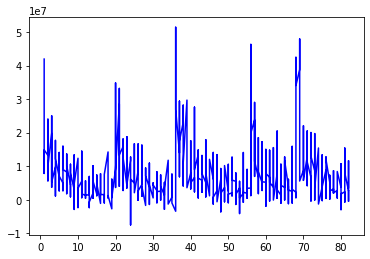

In [ ]:
df_new_poly = df_new_poly.sort_values(by = 'G')
plt.plot(df_new_poly['G'],regressor2.predict(X_poly),color='blue')
plt.show()

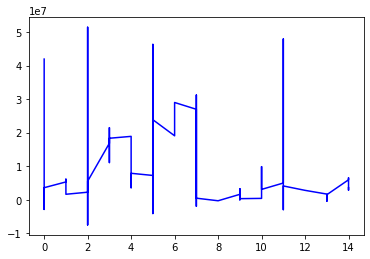

In [ ]:
df_new_poly = df_new_poly.sort_values(by = 'Pos')
plt.plot(df_new_poly['Pos'],regressor2.predict(X_poly),color='blue')
plt.show()

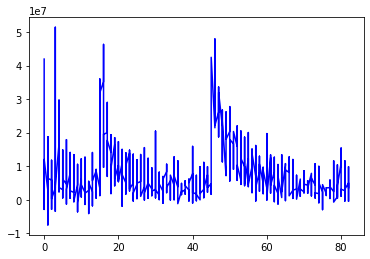

In [ ]:
df_new_poly = df_new_poly.sort_values(by = 'GS')
plt.plot(df_new_poly['GS'],regressor2.predict(X_poly),color='blue')
plt.show()

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = RidgeCV(alphas=np.arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')
model.fit(X, y)


RidgeCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
        scoring='neg_mean_absolute_error')

In [ ]:
y_pred3 = model.predict(X_test)
y_pred3
print(r2_score(y_test,y_pred3))
ridge_r2_score = r2_score(y_test,y_pred3)
rmse3 = np.sqrt(mean_squared_error(y_test, y_pred3))
print ('Root Mean Squared Error is :', rmse3)
ridge_mse = rmse3

0.5795446663236175
Root Mean Squared Error is : 5446570.838889874


In [ ]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_pred4 = regressor.predict(X_test)
y_pred4
y_test
print(r2_score(y_test,y_pred4))
random_forest_r2_score = r2_score(y_test,y_pred4)
rmse4 = np.sqrt(mean_squared_error(y_test, y_pred4))
print ('Root Mean Squared Error is :', rmse4)
random_forest_mse = rmse4

0.6718776351702269
Root Mean Squared Error is : 4811507.198956441


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from numpy import arange

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

lasso_model = Lasso().fit(X_train,y_train)

y_pred5 = lasso_model.predict(X_test)

print(r2_score(y_test,y_pred5))
lasso_r2_score = r2_score(y_test,y_pred5)
rmse5 = np.sqrt(mean_squared_error(y_test, y_pred5))
print ('Root Mean Squared Error is :', rmse5)
lasso_mse = rmse5



0.46423602168336286
Root Mean Squared Error is : 5723154.827333246


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.789e+16, tolerance: 1.301e+13
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
df_list = list(df[selected_features_BE].columns)
print(df_list)

['Age', 'G', 'GS', 'MP', 'FGA', '3P', '2PA', 'eFG%', 'TRB', 'AST', 'STL', 'BLK', 'PF', 'PTS']


In [ ]:
trial = [31,80,80,34.7,10,2.4,3,0.528,5.7,2.2,1.8,0.3,1.7,11.7]
print(len(trial))
y_pred8 = regressor.predict([trial])
y_pred8

14


array([7942413.14])

In [ ]:
new_listlen = (len(df_list))-1
quantile_list = [0]*new_listlen

for i in range(new_listlen):
  quantile_list[i] = df[df_list[i+1]].quantile([0.25,0.5,0.75], interpolation='nearest')
  quantile_list[i] = quantile_list[i].tolist()
print(quantile_list)


[[24, 48, 67], [1, 9, 39], [14.0, 20.4, 27.6], [3.9, 6.3, 9.8], [0.3, 0.8, 1.4], [2.2, 3.7, 6.3], [0.475, 0.514, 0.554], [2.0, 3.2, 4.8], [0.8, 1.4, 2.5], [0.4, 0.6, 0.9], [0.1, 0.3, 0.5], [1.3, 1.8, 2.3], [4.6, 7.5, 12.0]]


In [ ]:
update_trial = trial.copy()

for i in range(new_listlen):
  r = trial[i+1]
  a = quantile_list[i]
  for j in range(3):
    g = a[j]
    gg = g - (g * 0.12)
    if (r >= gg) and (r < g):
      update_trial[i+1] = g

print(update_trial)
y_pred9 = regressor.predict([update_trial])
y_pred9


[31, 80, 80, 34.7, 10, 2.4, 3, 0.554, 5.7, 2.5, 1.8, 0.3, 1.8, 12.0]


array([8443536.17])

In [ ]:
improved_features = []
improved_stats = []
for i in range(len(trial)):
  if (update_trial[i] != trial[i]):
    improved_features.append(df_list[i])
    stat_list = [trial[i],update_trial[i]]
    improved_stats.append(stat_list)

print(improved_features)
print(improved_stats)

['eFG%', 'AST', 'PF', 'PTS']
[[0.528, 0.554], [2.2, 2.5], [1.7, 1.8], [11.7, 12.0]]


In [ ]:
print('If you improve these stats:\n')
for i in range(len(improved_features)):
  print('From {0} to {1} for {2}'.format(improved_stats[i][0],improved_stats[i][1], improved_features[i]))

print('\nYour salary can increase from {0} to {1}'.format(y_pred8[0], y_pred9[0]))

If you improve these stats:

From 0.528 to 0.554 for eFG%
From 2.2 to 2.5 for AST
From 1.7 to 1.8 for PF
From 11.7 to 12.0 for PTS

Your salary can increase from 7942413.14 to 8443536.17


In [ ]:
# model comparison graph

model = ['Linear Regression', 'PolynomialFeatures', 'Ridge', 'RandomForestRegressor', 'Lasso']
model_r2_score = [linear_reg_r2_score, poly_r2_score, ridge_r2_score, random_forest_r2_score, lasso_r2_score]
model_mse = [linear_reg_mse, poly_mse, ridge_mse, random_forest_mse, lasso_mse]

df_model_comparison = pd.DataFrame(list(zip(model_r2_score, model_mse)), 
                                   index = model,
                                   columns = ['R2_Score', 'MSE'])
df_model_comparison

,R2_Score,MSE
Linear Regression,0.565646,5.535863e+06
PolynomialFeatures,0.625813,5.138160e+06
Ridge,0.579545,5.446571e+06
RandomForestRegressor,0.671878,4.811507e+06
Lasso,0.464236,5.723155e+06


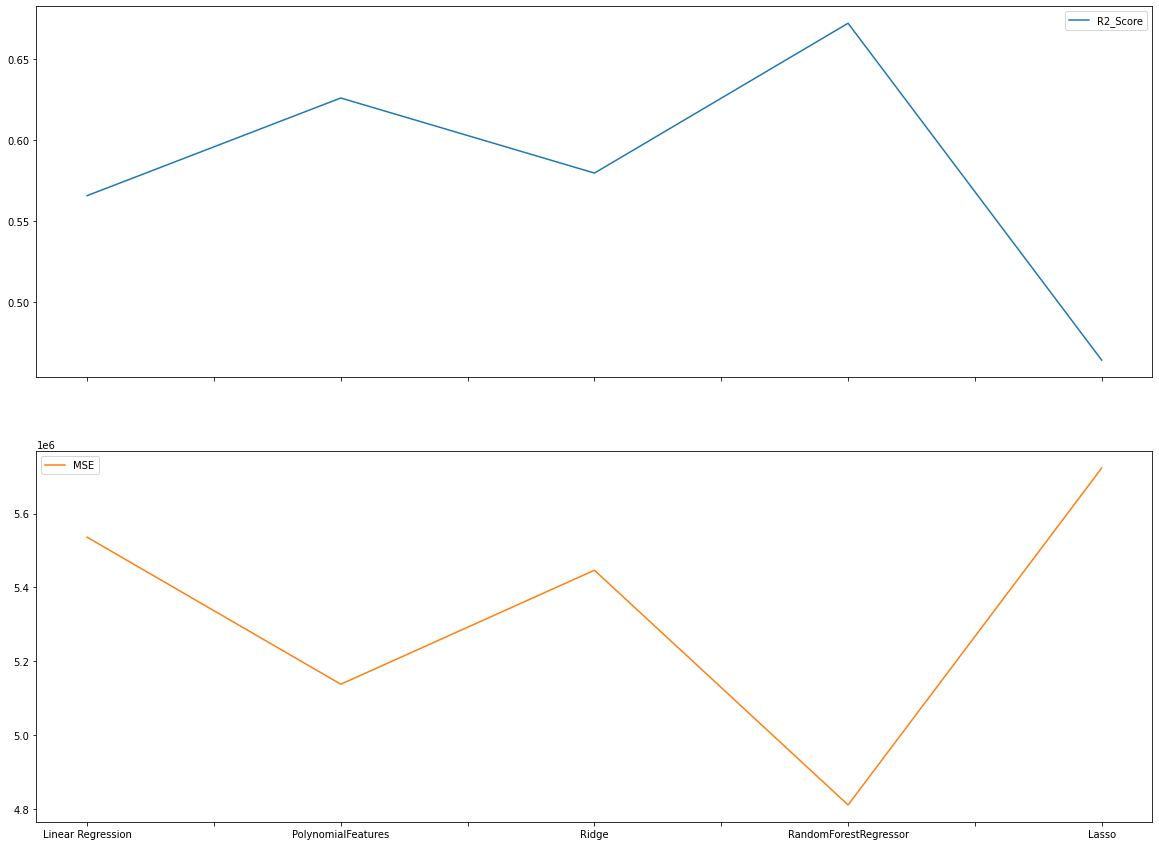

In [ ]:
line_graph = df_model_comparison.plot(figsize = (20, 15), subplots = True)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(color_codes=True)

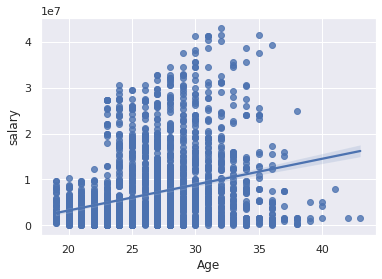

In [ ]:
sns.regplot(x = df['Age'] , y = df['salary'], data = df)


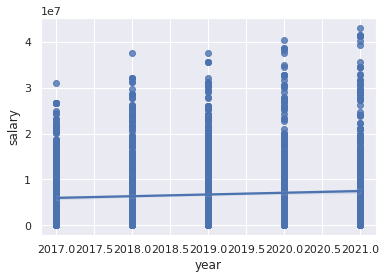

In [ ]:
sns.regplot(x = df['year'] , y = df['salary'], data = df)

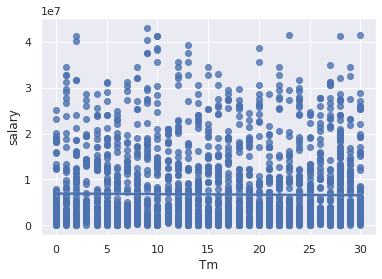

In [ ]:
sns.regplot(x = df['Tm'] , y = df['salary'], data = df)

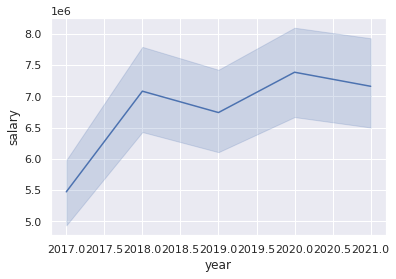

In [ ]:
sns.lineplot(data=df, x="year", y="salary")

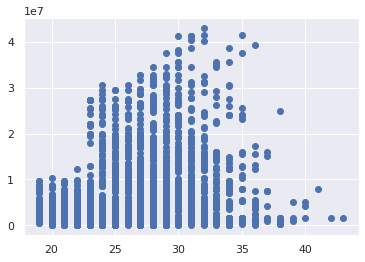

In [ ]:
age_plt = plt.scatter(df['Age'], df['salary'])

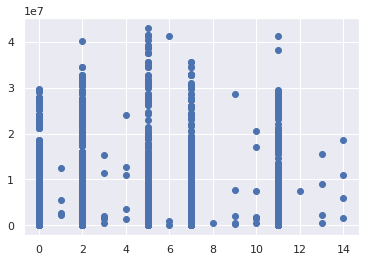

In [ ]:
pos_plt = plt.scatter(df['Pos'], df['salary'])

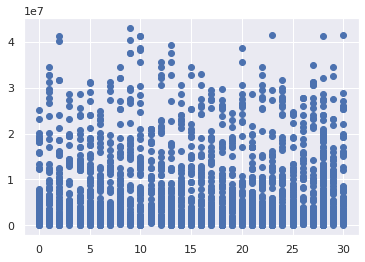

In [ ]:
tm_plt = plt.scatter(df['Tm'], df['salary'])

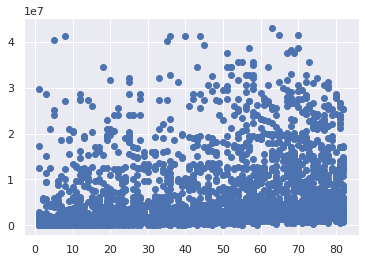

In [ ]:
g_plt = plt.scatter(df['G'], df['salary'])

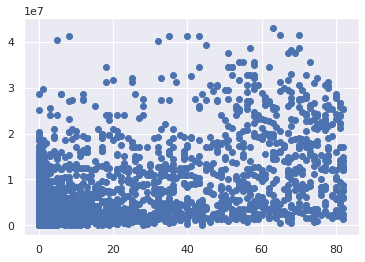

In [ ]:
gs_plt = plt.scatter(df['GS'], df['salary'])

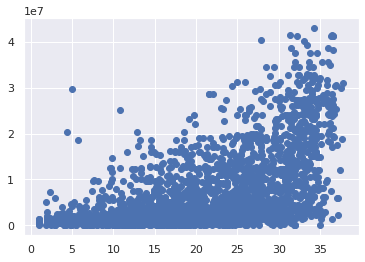

In [ ]:
mp_plt = plt.scatter(df['MP'], df['salary'])

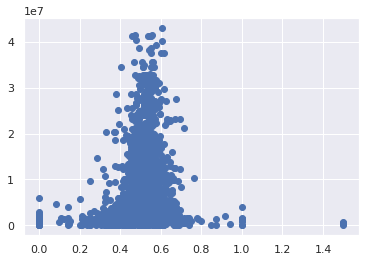

In [ ]:
ef_plt = plt.scatter(df['eFG%'], df['salary'])

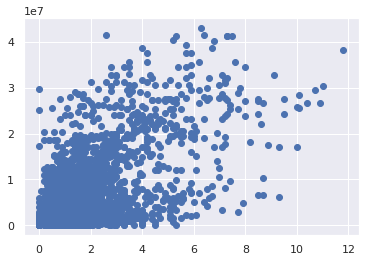

In [ ]:
fta_plt = plt.scatter(df['FTA'], df['salary'])

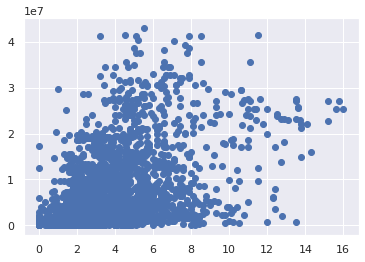

In [ ]:
trb_plt = plt.scatter(df['TRB'], df['salary'])

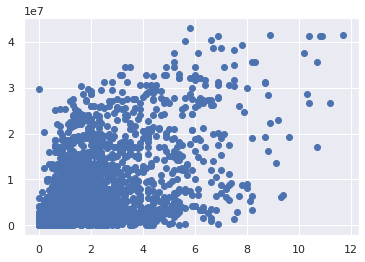

In [ ]:
ast_plt = plt.scatter(df['AST'], df['salary'])

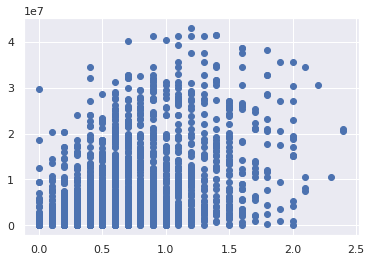

In [ ]:
stl_plt = plt.scatter(df['STL'], df['salary'])

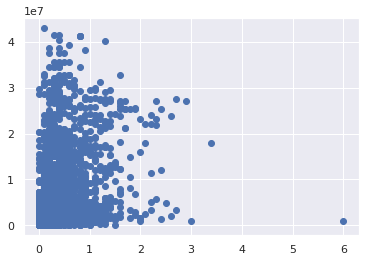

In [ ]:
blk_plt = plt.scatter(df['BLK'], df['salary'])

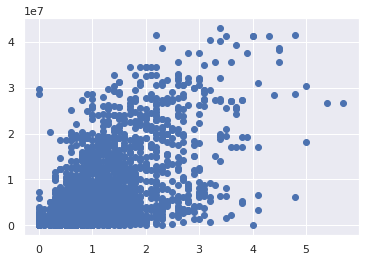

In [ ]:
tov_plt = plt.scatter(df['TOV'], df['salary'])

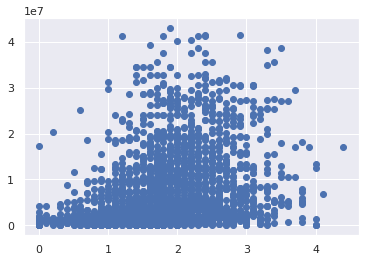

In [ ]:
pf_plt = plt.scatter(df['PF'], df['salary'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d728f7550>,
      dtype=object)

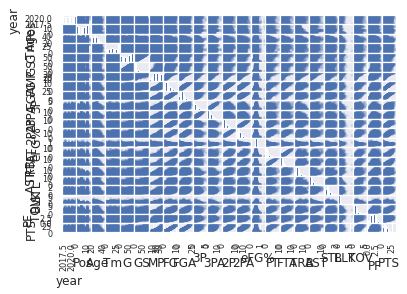

In [ ]:
pd.plotting.scatter_matrix(xdf, alpha=0.2)